In [ ]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report,mean_squared_error

In [ ]:
census = pd.read_csv('/content/census-income.csv')
census.shape

(32561, 15)

In [ ]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
shape = census.shape
total_count = shape[0]
total_count

32561

In [ ]:
census.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [ ]:
#Data PreProcessing
census.rename(columns = {' ' : 'Income'},inplace = True)
census.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
Income             0
dtype: int64

In [ ]:
#Data Manipulation
census_ed = census[' education']
census_seq = census.iloc[:,:8]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


In [ ]:
census_col = census.iloc[:,[5,8,11]]
census_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


In [ ]:
male_gov = census[(census[' sex'] == ' Male') & (census[' workclass'] == ' State-gov')]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


In [ ]:
census_us = census[(census['age'] == 39) & ((census[' native-country'] == ' United-States') | (census[' education'] == ' Bachelors'))]
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


In [ ]:
census_200 = census.sample(n=200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
21499,34,Private,174789,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,<=50K
11630,22,Federal-gov,65547,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,40,United-States,<=50K
21091,25,Private,236977,HS-grad,9,Separated,Craft-repair,Own-child,White,Male,0,0,40,Mexico,<=50K
1399,50,Private,137815,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,>50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,1408,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29563,33,Private,272411,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
28121,27,Private,302422,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
18887,37,Private,140713,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,Black,Male,0,0,40,Jamaica,>50K
28004,39,Private,180667,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
census[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [ ]:
census.groupby(' workclass')[' capital-gain'].mean()

 workclass
 ?                    606.795752
 Federal-gov          833.232292
 Local-gov            880.202580
 Never-worked           0.000000
 Private              889.217792
 Self-emp-inc        4875.693548
 Self-emp-not-inc    1886.061787
 State-gov            701.699538
 Without-pay          487.857143
Name:  capital-gain, dtype: float64

In [ ]:
census.groupby(' sex')['Income'].value_counts()

 sex     Income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: Income, dtype: int64

In [ ]:
cen_male = pd.DataFrame(census[(census['Income'] == ' >50K') & (census[' sex'] == ' Male')])
cen_male.reset_index(inplace = True, drop = True)
cen_male

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
1,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
2,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
3,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
4,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
6658,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
6659,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
6660,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
cen_female = pd.DataFrame(census[(census['Income'] == ' >50K') & (census[' sex'] == ' Female')])
cen_female.reset_index(inplace = True, drop = True)
cen_female

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
1,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
2,47,Private,51835,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,60,Honduras,>50K
3,53,Private,169846,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
4,44,Private,343591,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,14344,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
1175,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
1176,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
1177,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K


In [ ]:
cen_less50K_us = census[(census[' native-country'] == ' United-States') & (census['Income'] == ' <=50K') & (census[' workclass'] == ' Private')]
private = cen_less50K_us.groupby(' workclass')['Income'].count()
count_private = private[0]

In [ ]:
percentage_us_pvt = (count_private/total_count)*100
print('The percentage of people from the United States who are private employees and earn less than 50,000 annually: {:.2f}%'.format(percentage_us_pvt))

The percentage of people from the United States who are private employees and earn less than 50,000 annually: 47.89%


In [ ]:
census[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [ ]:
cen_mar = census[census[' marital-status']== ' Married-civ-spouse'].count()
percentage_mar = (cen_mar[' workclass']/total_count)*100
print('The percentage of married people in the census data: {:.2f}%'.format(percentage_mar))

The percentage of married people in the census data: 45.99%


In [ ]:
census[' education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

In [ ]:
cen_high = census[(census[' education'] == ' HS-grad') & (census['Income'] == ' >50K')].count()
percent_high = (cen_high[' education']/total_count)*100
print('The percentage of high school graduates earning more than 50,000 annually: {:.2f}%'.format(percent_high))

The percentage of high school graduates earning more than 50,000 annually: 5.14%


In [ ]:
#Linear Regression
x = pd.DataFrame(census[' education-num'])
y = census[' hours-per-week']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
error = []
for i,j in enumerate(zip(y_pred,y_test)):
  if i != j:
    error.append(i)

print(error)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

151.97722636288782

In [ ]:
rmse = sqrt(mse)
rmse

12.327904378396509

In [ ]:
#Logistic Regression
census[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [ ]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
x = census[' occupation'].replace(' ?','Consultant')

In [ ]:
y = census['Income'].replace([' <=50K',' >50K'],[0,1])
y.value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [ ]:
x.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
Consultant            1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [ ]:
le = LabelEncoder()
x = le.fit_transform(x)

In [ ]:
x = pd.DataFrame(x)
x

,0
0,0
1,3
2,5
3,5
4,9
...,...
32556,12
32557,6
32558,0
32559,0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=1)

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8800, 2597],
       [   0,    0]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7721330174607353

In [ ]:
x = pd.DataFrame(census[['age',' workclass',' education']])
x[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [ ]:
x[' workclass'] = x[' workclass'].replace(' ?','Consultant')
x

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
32556,27,Private,Assoc-acdm
32557,40,Private,HS-grad
32558,58,Private,HS-grad
32559,22,Private,HS-grad


In [ ]:
x = x.apply(le.fit_transform)
x

,age,workclass,education
0,22,6,9
1,33,5,9
2,21,3,11
3,36,3,1
4,11,3,9
...,...,...,...
32556,10,3,7
32557,23,3,11
32558,41,3,11
32559,5,3,11


In [ ]:
y = census['Income'].replace([' <=50K',' >50K'],[0,1])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
log1 = LogisticRegression()
log1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log1.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[4887, 1448],
       [ 139,   39]])

In [ ]:
accuracy_score(y_test,y_pred)

0.756333486872409

In [ ]:
#Decision Tree
data = census.copy()
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
data[' education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

In [ ]:
data['Income'].replace([' <=50K',' >50K'],[0,1],inplace=True)
data[' native-country'].replace(' ?','Unknown',inplace=True)
data[' education'].replace([' 11th',' 10th',' 7th-8th',' 9th',' 12th',' 5th-6th',' 1st-4th',' Preschool'],'school',inplace=True)
data[' education'].replace([' Assoc-voc', ' Assoc-acdm', ' Prof-school', ' Some-college'], 'Higher Ed',inplace=True)

In [ ]:
data[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [ ]:
data[' marital-status'].replace([' Married-civ-spouse',' Married-AF-spouse'],'Married',inplace=True)
data[' marital-status'].replace(' Never-married','Not-Married',inplace=True)
data[' marital-status'].replace([' Married-spouse-absent',' Widowed',' Separated',' Divorced'],'Other',inplace=True)

In [ ]:
data[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [ ]:
data[' workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [ ]:
data[' occupation'].replace(' ?',' Prof-specialty',inplace=True)
data[' workclass'].replace(' ?',' Private',inplace=True)

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Not-Married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [ ]:
data = data.apply(le.fit_transform)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,22,6,2671,0,12,1,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,0,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,0,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,0,9,5,2,0,0,0,39,4,0


In [ ]:
y = data['Income']
x = data.iloc[:,:14]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[6578,  843],
       [ 972, 1376]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8142082096427474

In [ ]:
#Random Forest
y = data['Income']
x = data.iloc[:,:14]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
confusion_matrix(y_pred,y_test)

array([[4643,  525],
       [ 383,  962]])

In [ ]:
accuracy_score(y_test,y_pred)

0.860586519269154

In [ ]:
#Population
pop = pd.read_csv('/content/popdata.csv')
pop

,value,date
0,127299.000,1952-01-01
1,127517.000,1952-02-01
2,127721.000,1952-03-01
3,127933.000,1952-04-01
4,128130.000,1952-05-01
...,...,...
811,300581.333,2019-08-01
812,300775.872,2019-09-01
813,300972.035,2019-10-01
814,301144.949,2019-11-01


In [ ]:
pop.shape

(816, 2)

In [ ]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pop.isnull().sum()

value    0
date     0
dtype: int64

In [ ]:
pop.set_index('date',inplace=True)

In [ ]:
pop.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


<Figure size 1440x720 with 0 Axes>

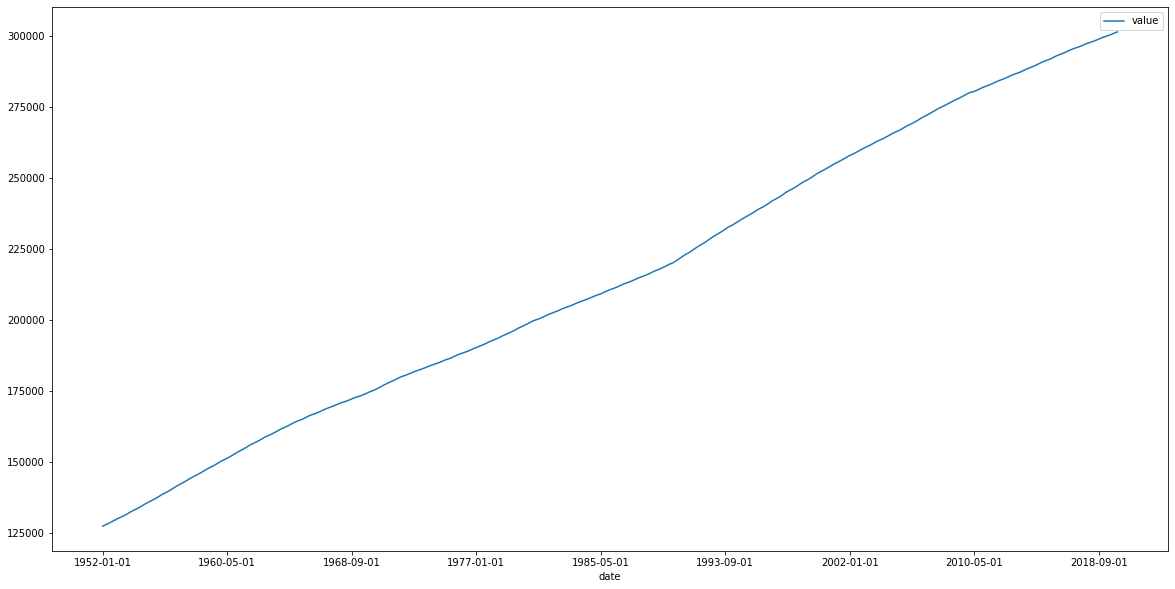

In [ ]:
plt.figure(figsize=(20,10))
pop.plot(figsize=(20,10))

In [ ]:
#rolmean and rolstd

rolmean=pop.rolling(window=12).mean()
rolstd=pop.rolling(window=12).std()
print(rolmean.head(20))
print(rolstd.head(20))

                    value
date                     
1952-01-01            NaN
1952-02-01            NaN
1952-03-01            NaN
1952-04-01            NaN
1952-05-01            NaN
1952-06-01            NaN
1952-07-01            NaN
1952-08-01            NaN
1952-09-01            NaN
1952-10-01            NaN
1952-11-01            NaN
1952-12-01  128482.583333
1953-01-01  128704.583333
1953-02-01  128924.833333
1953-03-01  129143.000000
1953-04-01  129360.750000
1953-05-01  129577.833333
1953-06-01  129795.583333
1953-07-01  130014.833333
1953-08-01  130235.750000
                 value
date                  
1952-01-01         NaN
1952-02-01         NaN
1952-03-01         NaN
1952-04-01         NaN
1952-05-01         NaN
1952-06-01         NaN
1952-07-01         NaN
1952-08-01         NaN
1952-09-01         NaN
1952-10-01         NaN
1952-11-01         NaN
1952-12-01  794.979526
1953-01-01  806.297538
1953-02-01  813.356439
1953-03-01  812.209556
1953-04-01  808.582163
1953-05-01  79

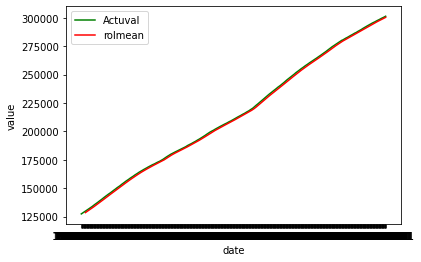

In [ ]:
actuval=plt.plot(pop,color='green',label='Actuval')
rolme=plt.plot(rolmean,color='red',label='rolmean')
plt.xlabel('date')
plt.ylabel('value')
plt.legend()
plt.show(block=False)

In [ ]:
pop1 = pop.iloc[:,0].values

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
test=adfuller(pop1, autolag='AIC')
output=pd.Series(test[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in test[4].items():
   output['Critical Value (%s)'%key] = value
print(output)

Dickey-Fuller Test: 
Test Statistic           -0.665317
p-value                   0.855530
Lags Used                17.000000
No. of Obs              798.000000
Critical Value (1%)      -3.438571
Critical Value (5%)      -2.865169
Critical Value (10%)     -2.568702
dtype: float64


In [ ]:
df_log=np.log(pop)
df_log

,value
date,
1952-01-01,11.754294
1952-02-01,11.756005
1952-03-01,11.757603
1952-04-01,11.759262
1952-05-01,11.760801
...,...
2019-08-01,12.613474
2019-09-01,12.614121
2019-10-01,12.614773


<Figure size 1080x720 with 0 Axes>

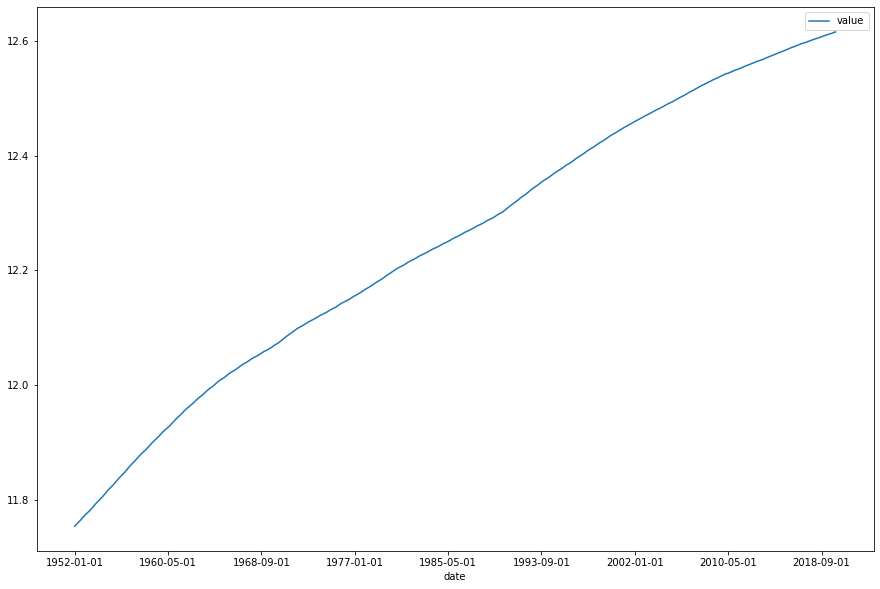

In [ ]:
plt.figure(figsize=(15,10))
df_log.plot(figsize=(15,10))

In [ ]:
lo_mag=df_log.rolling(window=12).mean()
lo_std=df_log.rolling(window=12).std()

<Figure size 1080x360 with 0 Axes>

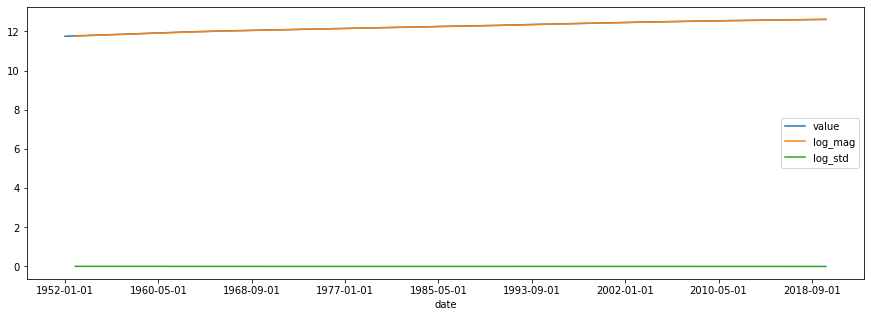

In [ ]:
plt.figure(figsize=(15,5))
#df.plot(label='original_data',title='original')
df_log.plot(label='df_log',figsize=(15,5))
plt.plot(lo_mag,label='log_mag')
plt.plot(lo_std,label='log_std')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(df_log.iloc[:,0].values, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -2.092019
p-value                   0.247736
Lags Used                17.000000
No. of Obs              798.000000
Critical Value (1%)      -3.438571
Critical Value (5%)      -2.865169
Critical Value (10%)     -2.568702
dtype: float64


In [ ]:
dif_df_log_mvg=df_log-lo_mag

In [ ]:
dif_df_log_mvg

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [ ]:
dif_df_log_mvg=dif_df_log_mvg.dropna()
dif_df_log_mvg

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [ ]:
dif_mvg=dif_df_log_mvg.rolling(window=12).mean()
dif_std=dif_df_log_mvg.rolling(window=12).std()

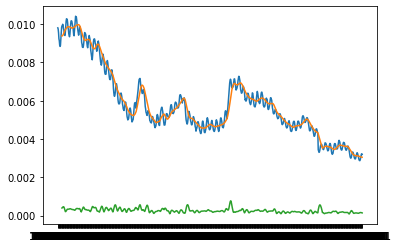

In [ ]:
plt.plot(dif_df_log_mvg)
plt.plot(dif_mvg)
plt.plot(dif_std)
plt.show()

In [ ]:
dif_df_log_mvg

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [ ]:
print('Dickey-Fuller Test: ')
dftest_log_diff=adfuller(dif_df_log_mvg['value'].dropna(), autolag='AIC')
dfoutput_log_diff=pd.Series(dftest_log_diff[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest_log_diff[4].items():
    dfoutput_log_diff['Critical Value (%s)'%key] = value
print(dfoutput_log_diff)

Dickey-Fuller Test: 
Test Statistic           -1.873742
p-value                   0.344513
Lags Used                17.000000
No. of Obs              787.000000
Critical Value (1%)      -3.438686
Critical Value (5%)      -2.865219
Critical Value (10%)     -2.568729
dtype: float64


In [ ]:
diff_log_df=dif_df_log_mvg-dif_mvg

In [ ]:
diff_log_mavg=diff_log_df.rolling(window=12).mean()
diff_log_std=diff_log_df.rolling(window=12).std()

<Figure size 1080x360 with 0 Axes>

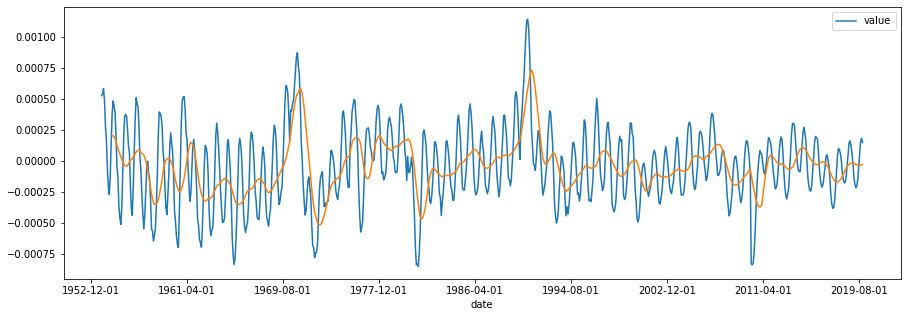

In [ ]:
plt.figure(figsize=(15,5))
diff_log_df.plot(figsize=(15,5))
plt.plot(diff_log_mavg)
plt.legend()
plt.show()

In [ ]:
print('Dickey-Fuller Test: ')
dftest_log_diff=adfuller(diff_log_df['value'].dropna(), autolag='AIC')
dfoutput_log_diff=pd.Series(dftest_log_diff[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest_log_diff[4].items():
    dfoutput_log_diff['Critical Value (%s)'%key] = value
print(dfoutput_log_diff)

Dickey-Fuller Test: 
Test Statistic           -4.201287
p-value                   0.000656
Lags Used                18.000000
No. of Obs              775.000000
Critical Value (1%)      -3.438816
Critical Value (5%)      -2.865277
Critical Value (10%)     -2.568760
dtype: float64


In [ ]:
from pmdarima.arima import auto_arima,ARIMA

In [ ]:
diff_log_df=diff_log_df.dropna()

In [ ]:
stepwise_fitting=auto_arima(diff_log_df["value"],trace=True)
stepwise_fitting.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12786.116, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10584.772, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11991.424, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10582.769, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10571.375, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-12391.892, Time=1.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12749.814, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-12840.917, Time=0.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-12758.318, Time=1.34 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-10572.262, Time=1.20 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-10572.257, Time=1.31 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-12763.998, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-12740.939, Time=0.64 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-12832.099, Time=0.80 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(3, 0, 4)   Log Likelihood                6485.629
Date:                Tue, 10 May 2022   AIC                         -12953.259
Time:                        11:53:18   BIC                         -12911.165
Sample:                             0   HQIC                        -12937.083
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.695e-06   1.17e-06     -3.150      0.002      -6e-06    -1.4e-06
ar.L1          2.5543      0.003   1020.358      0.000       2.549       2.559
ar.L2         -2.4210      0.001  -2932.647      0.000      -2.423      -2.419
ar.L3          0.8290      0.002    369.625      0.000       0.825       0.833
ma.L1         -1.1465      0.000  -3861.429      0.000      -1.147      -1.146
ma.L2          0.4657      0.000   1745.430      0.000       0.465       0.466
ma.L3          0.0372      0.000    163.773      0.000       0.037       0.038
ma.L4          0.0807      0.000    515.923      0.000       0.080       0.081
sigma2      4.971e-09   1.05e-10     47.175      0.000    4.76e-09    5.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):              6014.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.66e+18. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
pop

,value
date,
1952-01-01,127299.000
1952-02-01,127517.000
1952-03-01,127721.000
1952-04-01,127933.000
1952-05-01,128130.000
...,...
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035


In [ ]:
df_train=pop[0:572]
df_test=pop[572:816]
df_train.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


In [ ]:
pop_model=ARIMA(df_train,order=(3,1,4))

In [ ]:
pop_model_fit=pop_model.fit()

In [ ]:
pop_model_fit.aic

5241.96956732626

In [ ]:
df_test.shape

(244, 1)

In [ ]:
pop_forcasting=pop_model_fit.forecast(steps=244)

In [ ]:
print('mean squre error',mean_squared_error(df_test,pop_forcasting))
print('Rmse',np.sqrt(mean_squared_error(df_test,pop_forcasting)))

mean squre error 508240369.90687764
Rmse 22544.18705358163


In [ ]:
from fbprophet import Prophet

In [ ]:
df=pd.read_csv('/content/popdata.csv')
df.head()

,value,date
0,127299.0,1952-01-01
1,127517.0,1952-02-01
2,127721.0,1952-03-01
3,127933.0,1952-04-01
4,128130.0,1952-05-01


In [ ]:
df['Value']=df['value']
df=df.drop(columns=['value'])
df.head()

,date,Value
0,1952-01-01,127299.0
1,1952-02-01,127517.0
2,1952-03-01,127721.0
3,1952-04-01,127933.0
4,1952-05-01,128130.0


In [ ]:
df.columns=['ds','y']
df.head()

,ds,y
0,1952-01-01,127299.0
1,1952-02-01,127517.0
2,1952-03-01,127721.0
3,1952-04-01,127933.0
4,1952-05-01,128130.0


In [ ]:
model=Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates=model.make_future_dataframe(periods=180)

In [ ]:
future_dates

,ds
0,1952-01-01
1,1952-02-01
2,1952-03-01
3,1952-04-01
4,1952-05-01
...,...
991,2020-05-25
992,2020-05-26
993,2020-05-27
994,2020-05-28


In [ ]:
future_predection=model.predict(future_dates)

In [ ]:
future_predection.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1952-01-01,127237.775743,126995.717954,127580.582793,127237.775743,127237.775743,43.820000,43.820000,43.820000,43.820000,43.820000,43.820000,0.0,0.0,0.0,127281.595743
1,1952-02-01,127467.066588,127200.376045,127805.803296,127467.066588,127467.066588,23.119322,23.119322,23.119322,23.119322,23.119322,23.119322,0.0,0.0,0.0,127490.185910
2,1952-03-01,127681.564475,127391.873582,127960.690469,127681.564475,127681.564475,-6.247950,-6.247950,-6.247950,-6.247950,-6.247950,-6.247950,0.0,0.0,0.0,127675.316525
3,1952-04-01,127910.855320,127591.503770,128193.697941,127910.855320,127910.855320,-38.939724,-38.939724,-38.939724,-38.939724,-38.939724,-38.939724,0.0,0.0,0.0,127871.915595
4,1952-05-01,128132.749685,127761.948903,128367.820053,128132.749685,128132.749685,-63.284843,-63.284843,-63.284843,-63.284843,-63.284843,-63.284843,0.0,0.0,0.0,128069.464843


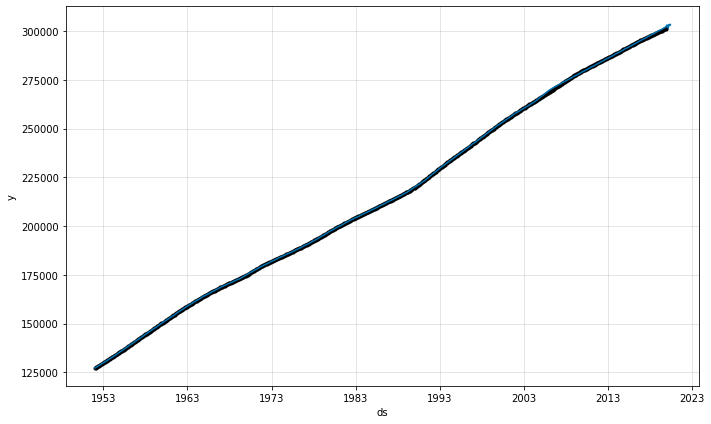

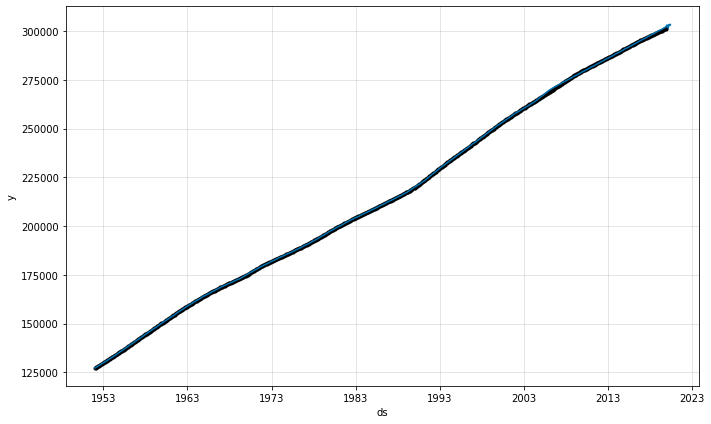

In [ ]:
model.plot(future_predection)

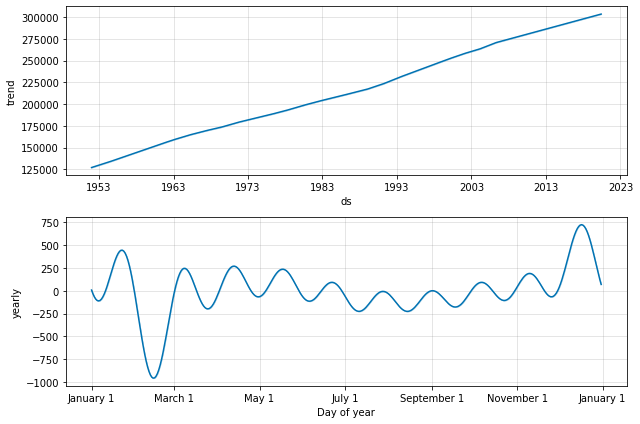

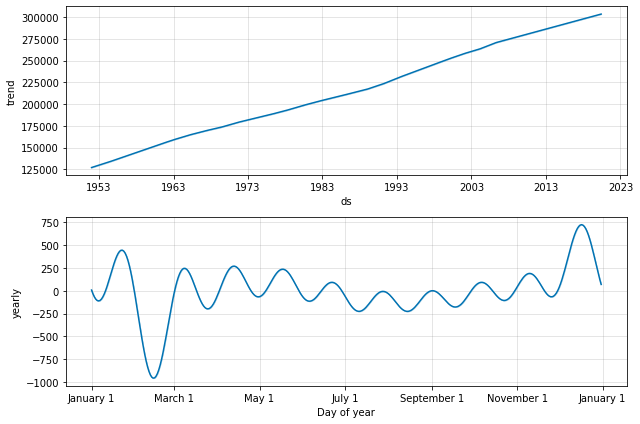

In [ ]:
#visuval plot
model.plot_components(future_predection)